#Rips, Cech, Alpha

Raúl Alejandro Pérez Saucedo A01566937

In [2]:
#!pip install gudhi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 9.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm # Manejar colores
from scipy.spatial.distance import squareform, pdist #Calcular matrices de distancias
import matplotlib.patches as mpatches # Para hece elipses
from matplotlib.collections import PatchCollection # ära hacer elipses
import gudhi #Para hacer la filtración de complejos simpliciales de Rips y Alpha

In [4]:
data1 = pd.read_csv("Activity1.csv")
data2 = pd.read_csv("Activity2.csv")
data3 = pd.read_csv("Activity3.csv")

data_1 = data1.to_numpy()
data_2 = data2.to_numpy()
data_3 = data3.to_numpy()

### Gráficas

<Axes: xlabel='0', ylabel='1'>

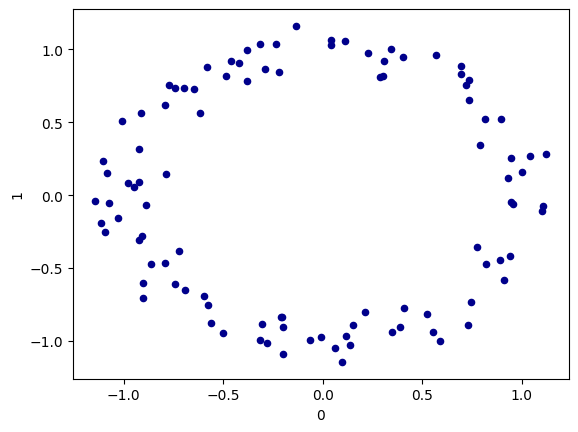

In [5]:
data1.plot.scatter(x=0, y=1,c='DarkBlue')

La figura se parece a un círculo

<Axes: xlabel='0', ylabel='1'>

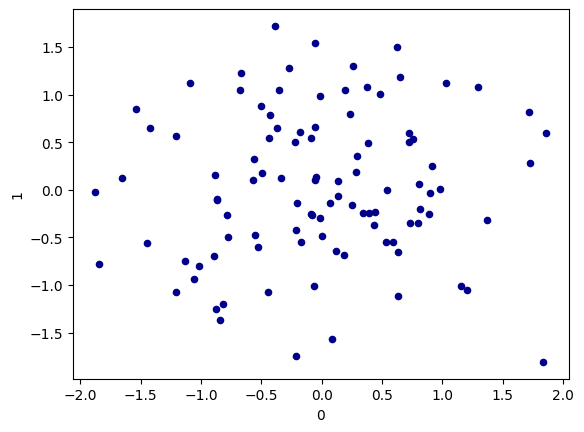

In [6]:
data2.plot.scatter(x=0, y=1,c='DarkBlue')

Aquí se ve un círculo con más ruido

<Axes: xlabel='0', ylabel='1'>

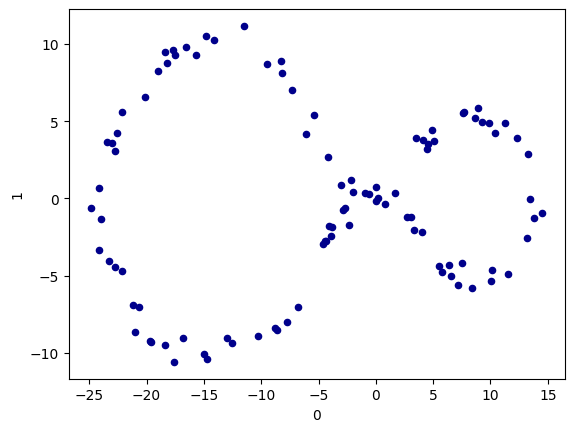

In [7]:
data3.plot.scatter(x=0, y=1,c='DarkBlue')

Aquí se parece a una forma de infinito

## Rips

In [8]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

def plot_rips_complex(data, R, label="data", col=1, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data[:, 0], data[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data)))
    )

    for xy in data:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data):
        if maxdim >=1:
            for j in range(i + 1, len(data)):
                pq = data[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data)):
                        ab = data[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

### Data 1

In [9]:
#Calculamos la filtración de Ribs con un radio de 20
rips_complex = gudhi.RipsComplex(points=data_1,
                                 max_edge_length = 20.0)
#Generamos el árbol de complejos simpliciales e imprimimos la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Se han truncado las últimas 5000 líneas del flujo de salida.
[51, 66, 99] -> 2.19
[52, 66, 99] -> 2.19
[53, 66, 99] -> 2.19
[54, 66, 99] -> 2.19
[56, 66, 99] -> 2.19
[57, 66, 99] -> 2.19
[58, 66, 99] -> 2.19
[59, 66, 99] -> 2.19
[60, 66, 99] -> 2.19
[61, 66, 99] -> 2.19
[62, 66, 99] -> 2.19
[63, 66, 99] -> 2.19
[64, 66, 99] -> 2.19
[65, 66, 99] -> 2.19
[66, 67, 99] -> 2.19
[66, 69, 99] -> 2.19
[66, 70, 99] -> 2.19
[66, 71, 99] -> 2.19
[66, 72, 99] -> 2.19
[66, 73, 99] -> 2.19
[66, 75, 99] -> 2.19
[66, 76, 99] -> 2.19
[66, 77, 99] -> 2.19
[66, 78, 99] -> 2.19
[66, 79, 99] -> 2.19
[66, 80, 99] -> 2.19
[66, 81, 99] -> 2.19
[66, 82, 99] -> 2.19
[66, 83, 99] -> 2.19
[66, 84, 99] -> 2.19
[66, 85, 99] -> 2.19
[66, 86, 99] -> 2.19
[66, 87, 99] -> 2.19
[66, 88, 99] -> 2.19
[66, 89, 99] -> 2.19
[66, 90, 99] -> 2.19
[66, 91, 99] -> 2.19
[66, 92, 99] -> 2.19
[66, 93, 99] -> 2.19
[66, 94, 99] -> 2.19
[66, 95, 99] -> 2.19
[66, 96, 99] -> 2.19
[66, 97, 99] -> 2.19
[66, 98, 99] -> 2.19
[82, 89] -> 2.1

<ipython-input-8-5fdb9dbad15d>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


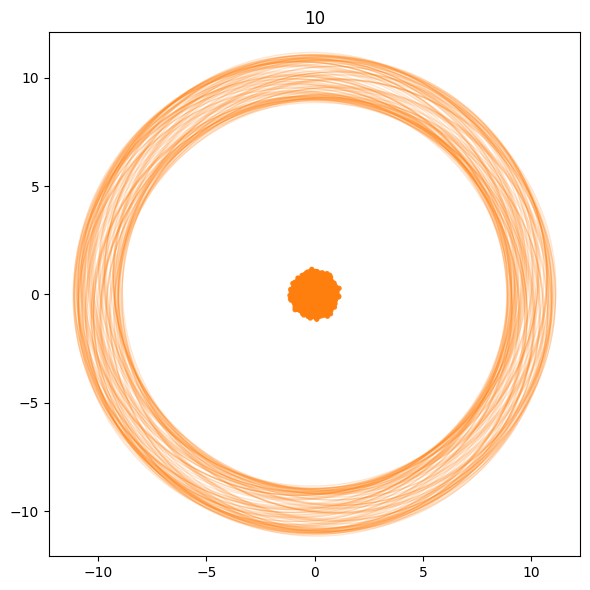

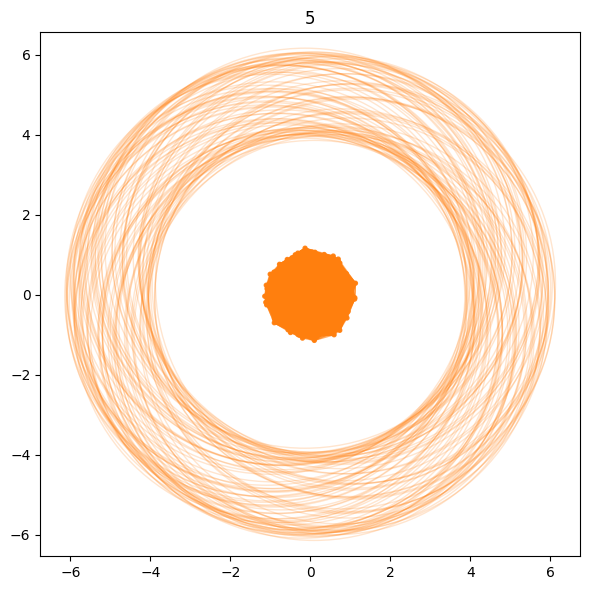

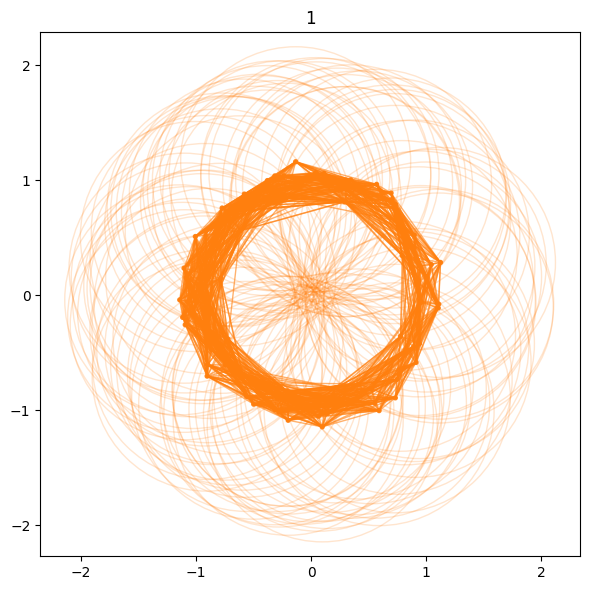

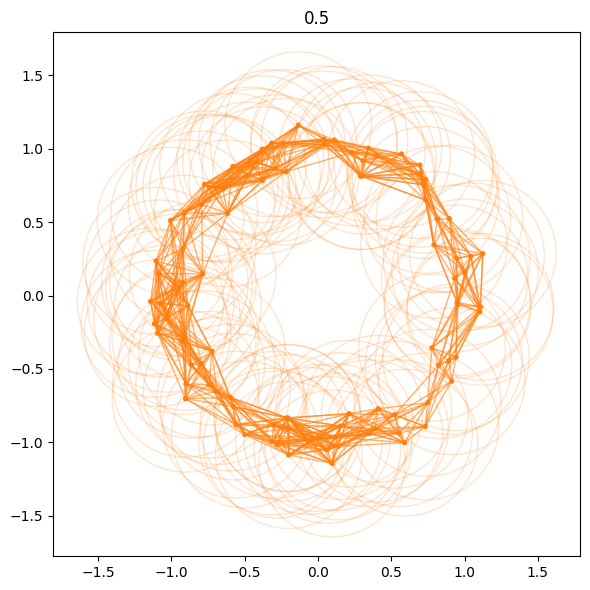

In [10]:
import matplotlib.pyplot as plt

R_values = [10, 5, 1, 0.5]

for i in range(len(R_values)):
    plot_rips_complex(data_1, R=R_values[i], label=R_values[i], maxdim=1)

plt.show()

Confirmamos que la forma es un círculo

### Data 2

In [11]:
#Calculamos la filtración de Ribs con un radio de 20
rips_complex = gudhi.RipsComplex(points=data_2,
                                 max_edge_length = 20.0)
#Generamos el árbol de complejos simpliciales e imprimimos la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + 'simplices - ' + \
    repr(simplex_tree.num_vertices()) + 'vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Se han truncado las últimas 5000 líneas del flujo de salida.
[8, 35, 72] -> 3.28
[8, 35, 73] -> 3.28
[8, 35, 74] -> 3.28
[8, 35, 75] -> 3.28
[8, 35, 76] -> 3.28
[8, 35, 77] -> 3.28
[8, 35, 78] -> 3.28
[8, 35, 79] -> 3.28
[8, 35, 80] -> 3.28
[8, 35, 81] -> 3.28
[8, 35, 82] -> 3.28
[8, 35, 83] -> 3.28
[8, 35, 84] -> 3.28
[8, 35, 85] -> 3.28
[8, 35, 86] -> 3.28
[8, 35, 87] -> 3.28
[8, 35, 88] -> 3.28
[8, 35, 89] -> 3.28
[8, 35, 90] -> 3.28
[8, 35, 91] -> 3.28
[8, 35, 92] -> 3.28
[8, 35, 93] -> 3.28
[8, 35, 94] -> 3.28
[8, 35, 95] -> 3.28
[8, 35, 96] -> 3.28
[8, 35, 97] -> 3.28
[8, 35, 98] -> 3.28
[8, 35, 99] -> 3.28
[0, 33] -> 3.28
[0, 2, 33] -> 3.28
[0, 3, 33] -> 3.28
[0, 4, 33] -> 3.28
[0, 5, 33] -> 3.28
[0, 6, 33] -> 3.28
[0, 7, 33] -> 3.28
[0, 9, 33] -> 3.28
[0, 10, 33] -> 3.28
[0, 11, 33] -> 3.28
[0, 12, 33] -> 3.28
[0, 13, 33] -> 3.28
[0, 14, 33] -> 3.28
[0, 15, 33] -> 3.28
[0, 16, 33] -> 3.28
[0, 17, 33] -> 3.28
[0, 18, 33] -> 3.28
[0, 19, 33] -> 3.28
[0, 20, 33] -> 3.28
[0, 21, 33

<ipython-input-8-5fdb9dbad15d>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


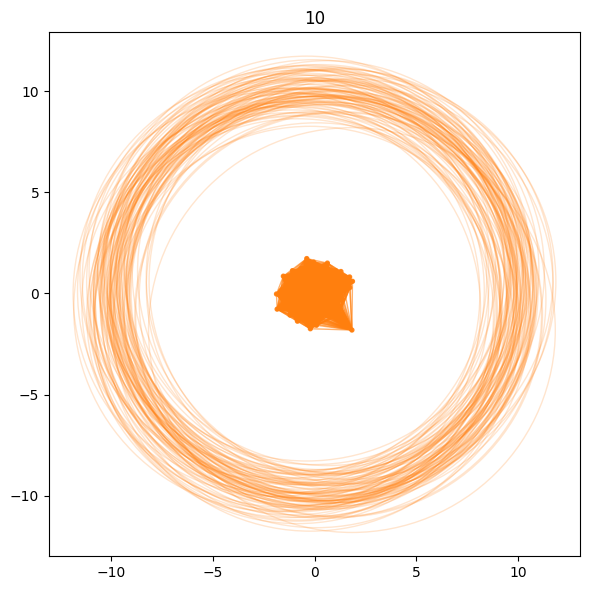

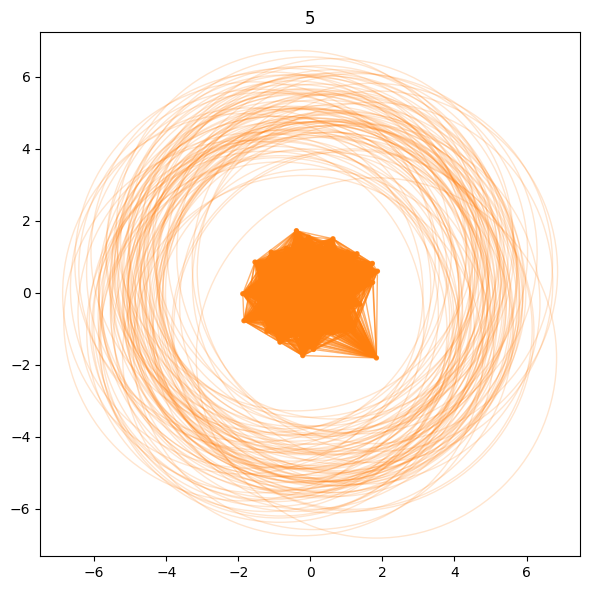

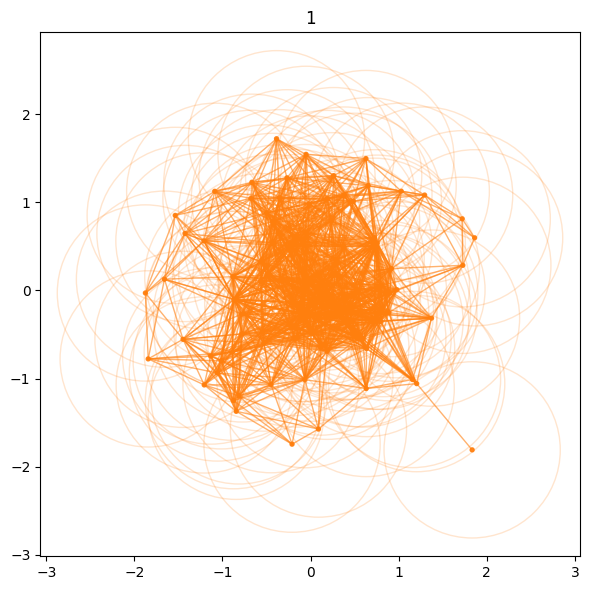

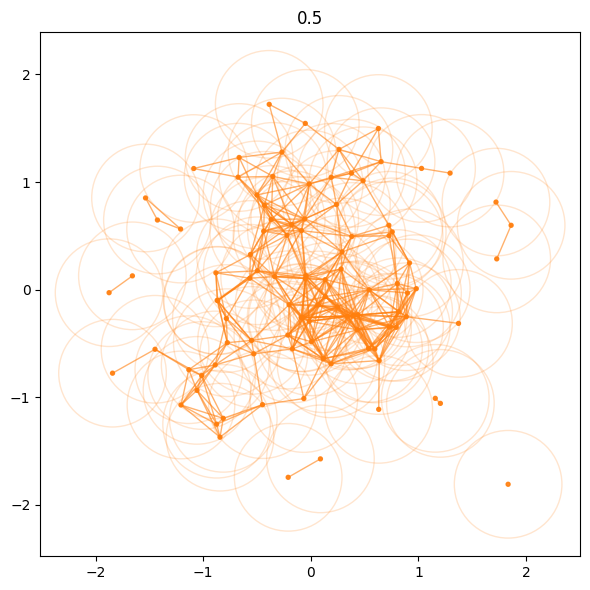

In [12]:
import matplotlib.pyplot as plt

R_values = [10, 5, 1, 0.5]

for i in range(len(R_values)):
    plot_rips_complex(data_2, R=R_values[i], label=R_values[i], maxdim=1)

plt.show()

La forma de estos datos es mucho más desordenada, pero sigue pareciéndose a un círculo

### Data 3

In [13]:
#Calculamos la filtración de Ribs con un radio de 20
rips_complex = gudhi.RipsComplex(points=data_3,
                                 max_edge_length = 20.0)
#Generamos el árbol de complejos simpliciales e imprimimos la información
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + 'simplices - ' + \
    repr(simplex_tree.num_vertices()) + 'vertices.'
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

Se han truncado las últimas 5000 líneas del flujo de salida.
[11, 27, 40] -> 19.62
[12, 27, 40] -> 19.62
[13, 27, 40] -> 19.62
[14, 27, 40] -> 19.62
[15, 27, 40] -> 19.62
[17, 27, 40] -> 19.62
[18, 27, 40] -> 19.62
[19, 27, 40] -> 19.62
[21, 27, 40] -> 19.62
[22, 27, 40] -> 19.62
[23, 27, 40] -> 19.62
[24, 27, 40] -> 19.62
[25, 27, 40] -> 19.62
[26, 27, 40] -> 19.62
[27, 29, 40] -> 19.62
[27, 30, 40] -> 19.62
[27, 31, 40] -> 19.62
[27, 32, 40] -> 19.62
[27, 33, 40] -> 19.62
[27, 34, 40] -> 19.62
[27, 36, 40] -> 19.62
[27, 37, 40] -> 19.62
[27, 39, 40] -> 19.62
[27, 40, 41] -> 19.62
[27, 40, 42] -> 19.62
[27, 40, 43] -> 19.62
[27, 40, 44] -> 19.62
[27, 40, 45] -> 19.62
[27, 40, 99] -> 19.62
[31, 79] -> 19.62
[0, 31, 79] -> 19.62
[1, 31, 79] -> 19.62
[2, 31, 79] -> 19.62
[3, 31, 79] -> 19.62
[4, 31, 79] -> 19.62
[5, 31, 79] -> 19.62
[6, 31, 79] -> 19.62
[7, 31, 79] -> 19.62
[9, 31, 79] -> 19.62
[10, 31, 79] -> 19.62
[11, 31, 79] -> 19.62
[12, 31, 79] -> 19.62
[13, 31, 79] -> 19.62
[15, 3

<ipython-input-8-5fdb9dbad15d>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


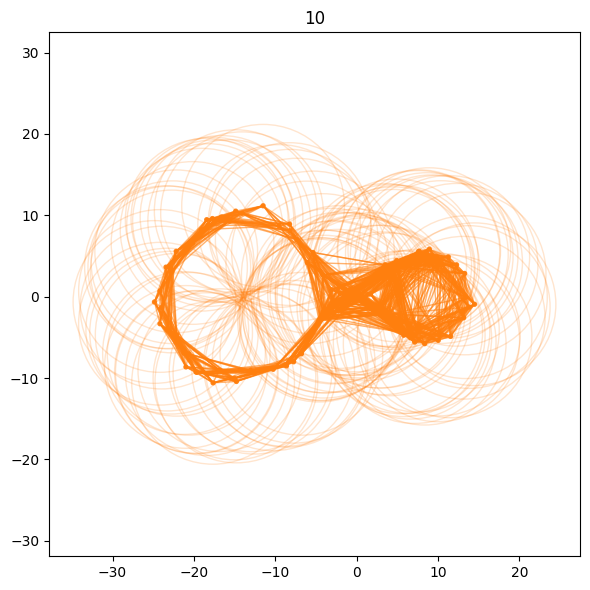

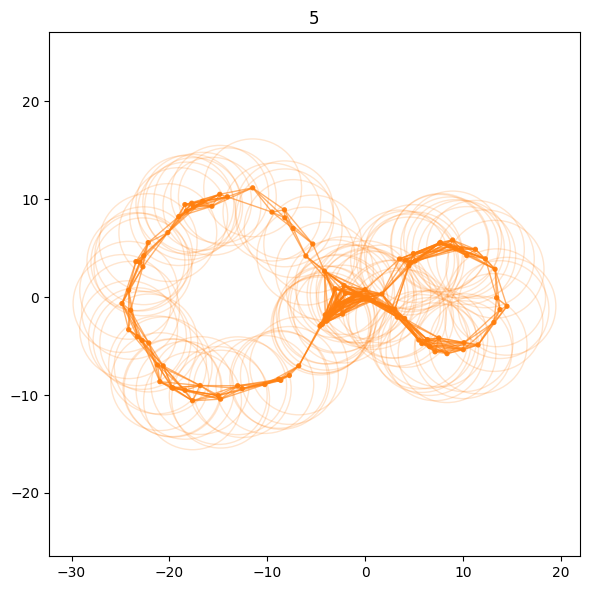

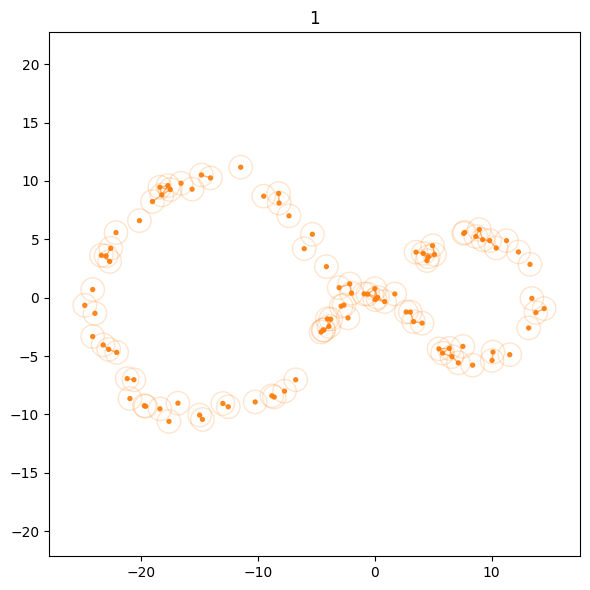

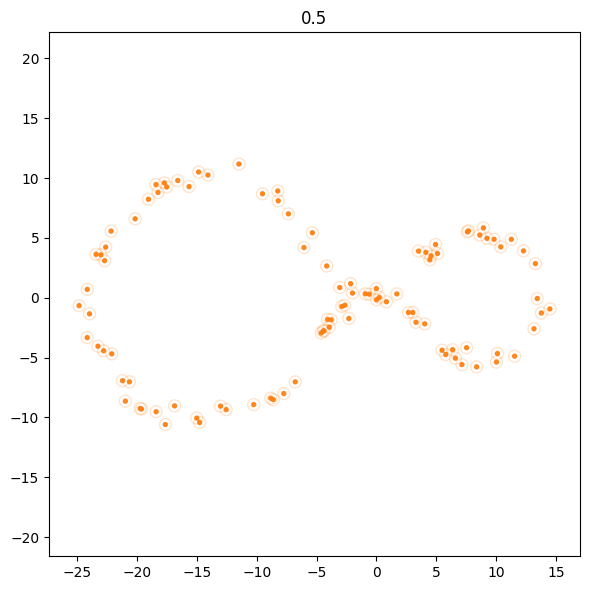

In [14]:
import matplotlib.pyplot as plt

R_values = [10, 5, 1, 0.5]

for i in range(len(R_values)):
    plot_rips_complex(data_3, R=R_values[i], label=R_values[i], maxdim=1)

plt.show()

La figura sí es un infinito, con el círculo izquierda de mayor "radio"

## Alpha

### Data 1

In [15]:
from gudhi import AlphaComplex
ac = AlphaComplex(points=data_1)

stree = ac.create_simplex_tree()
print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')

fmt = '%s -> %.2f'
for filtered_value in stree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension  2  -  557  simplices -  100  vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72]

### Data 2

In [16]:
ac = AlphaComplex(points=data_2)

stree = ac.create_simplex_tree()
print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')

fmt = '%s -> %.2f'
for filtered_value in stree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension  2  -  573  simplices -  100  vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72]

### Data 3

In [17]:
ac = AlphaComplex(points=data_3)

stree = ac.create_simplex_tree()
print('Alpha complex is of dimension ', stree.dimension(), ' - ',
  stree.num_simplices(), ' simplices - ', stree.num_vertices(), ' vertices.')

fmt = '%s -> %.2f'
for filtered_value in stree.get_filtration():
    print(fmt % tuple(filtered_value))

Alpha complex is of dimension  2  -  559  simplices -  100  vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[7] -> 0.00
[8] -> 0.00
[9] -> 0.00
[10] -> 0.00
[11] -> 0.00
[12] -> 0.00
[13] -> 0.00
[14] -> 0.00
[15] -> 0.00
[16] -> 0.00
[17] -> 0.00
[18] -> 0.00
[19] -> 0.00
[20] -> 0.00
[21] -> 0.00
[22] -> 0.00
[23] -> 0.00
[24] -> 0.00
[25] -> 0.00
[26] -> 0.00
[27] -> 0.00
[28] -> 0.00
[29] -> 0.00
[30] -> 0.00
[31] -> 0.00
[32] -> 0.00
[33] -> 0.00
[34] -> 0.00
[35] -> 0.00
[36] -> 0.00
[37] -> 0.00
[38] -> 0.00
[39] -> 0.00
[40] -> 0.00
[41] -> 0.00
[42] -> 0.00
[43] -> 0.00
[44] -> 0.00
[45] -> 0.00
[46] -> 0.00
[47] -> 0.00
[48] -> 0.00
[49] -> 0.00
[50] -> 0.00
[51] -> 0.00
[52] -> 0.00
[53] -> 0.00
[54] -> 0.00
[55] -> 0.00
[56] -> 0.00
[57] -> 0.00
[58] -> 0.00
[59] -> 0.00
[60] -> 0.00
[61] -> 0.00
[62] -> 0.00
[63] -> 0.00
[64] -> 0.00
[65] -> 0.00
[66] -> 0.00
[67] -> 0.00
[68] -> 0.00
[69] -> 0.00
[70] -> 0.00
[71] -> 0.00
[72]